![Hurricane Harvey](Images/Harvey_landfall_space.jpg)

# Hurricane Harvey

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt # Plotting library
import pandas as pd
import numpy as np
import requests
import datetime
import sys
# Import API key
from api_keys import noaa_key
print("All necessary libraries installed")

All necessary libraries installed


### Hurricane Harvey, Category 4 hurricane, first major hurricane to make landfall in US since Wilma in 2005
**_Made landfall at San Jose island, Texas at peak intensity on August 26,2017 followed by second landfall Holiday Beach (Cat3).Turned into tropical storm and emerged from Gulf of Mexico with 5th and final landfall in Louisiana on August 29. 300,000 structures, 500,000 vehicles damaged or destroyed, 125billion dollar loss. Costliest tropical storm alongside Katrina._**

## Location id:  Texas ("FIPS:48")

### Dataset id: "GHCND" (name: "Daily Summaries")

![Gulf of Mexico](Images/Harvey_twitter.jpg)

## Let's see all the stations near Rockport where Harvey made landfall

In [2]:
import json
# Let's get fetch all the stations near Rockport, Texas
# Rockport, TX (78382); Aransas Pass, TX (78336); Port Aransas, TX (78373)
mytoken = noaa_key
location_id = "FIPS:48"
dataset_id = "GHCND"
zipcodes = ["ZIP:78374","ZIP:78418","ZIP:78415","ZIP:78382","ZIP:78336","ZIP:78373"]
# Define base url to get weather summaries
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?"
# Let's create a list to hold the responses from API call
station_id = []
station_name = []
latitude = []
longitude = []
for zipcode in zipcodes:
    # Create a query_url
    query_url = base_url+"datasetid=GHCND"+"&"+"locationid="+str(zipcode)+"&"+"limit=100"
    # Create the request query
    response = requests.get(query_url, headers = {"token":mytoken})
    # Print the response url 
    print('\033[1m'+"Zipcode :{}".format(zipcode)+'\033[0m')
    print("Request status code: "+str(response.status_code))
    response_json = response.json()
    # Let's fill the dictionaries from the response file
    for i in range(len(response_json["results"])):
        try:
            station_id.append(response_json["results"][i]["id"])
            station_name.append(response_json["results"][i]["name"])
            latitude.append(response_json["results"][i]["latitude"])
            longitude.append(response_json["results"][i]["longitude"])
            # Handle exceptions for data not found in the response file
        except(KeyError, ValueError):
            # Print error message
            print("Index {} : Data Not found ! Skipping..".format(i))
            pass

Zipcode :ZIP:78374
Request status code: 200
Zipcode :ZIP:78418
Request status code: 200
Zipcode :ZIP:78415
Request status code: 200
Zipcode :ZIP:78382
Request status code: 200
Zipcode :ZIP:78336
Request status code: 200
Zipcode :ZIP:78373
Request status code: 200


## Creating a dataframe from the response

In [3]:
# Let's create a DataFrame with the lists
df_RckPrtStations = pd.DataFrame({
    "Station id": station_id,
    "Station name": station_name,
    "Latitude": latitude,
    "Longitude": longitude
})
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("df_RckPrtStations",df_RckPrtStations.shape)+'\033[0m')
df_RckPrtStations.head() # Display the DataFrame

The shape of the df_RckPrtStations dataframe is: (40, 4)


,Station id,Station name,Latitude,Longitude
0,GHCND:US1TXSP0009,"PORTLAND 1.2 NW, TX US",27.893114,-97.338318
1,GHCND:US1TXSP0017,"PORTLAND 2.4 NE, TX US",27.902295,-97.298807
2,GHCND:US1TXSP0018,"PORTLAND 1.3 NW, TX US",27.892892,-97.340161
3,GHCND:USC00417195,"PORTLAND, TX US",27.892000,-97.339300
4,GHCND:US1TXNU0007,"CORPUS CHRISTI 9.0 SSE, TX US",27.590507,-97.224739


In [4]:
# Let's create a list of stations 
LRckPrtStations = pd.Series(df_RckPrtStations["Station id"])

## Let's collect data from the selected stations close to the day Harvey made landfall

### Collect response from the selected zipcodes 

In [5]:
import json
# Let's get fetch data from all the stations near Rockport, Texas
mytoken = noaa_key
location_id = "FIPS:48"
dataset_id = "GHCND"
zipcodes = ["ZIP:78374","ZIP:78418","ZIP:78415","ZIP:78382","ZIP:78336","ZIP:78373"]
start_date = "2017-08-20"
end_date = "2017-08-31"
# Define base url to get weather summaries
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?"
# Let's create a list of dictionaries
weather_data = []
# Display the start of Data Retrieval
#print(f"****** Beginning Data Retrieval *********")
# Let's fill the dictionaries from the response file
for zipcode in zipcodes:
    # Create a query_url
    query_url = base_url+"datasetid="+str(dataset_id)+"&"+"locationid="+str(zipcode)+"&"+"startdate="+str(start_date)+"&"+"enddate="+str(end_date)+"&"+"limit=600"+"&"+"units=standard"
    # Create the request query
    response = requests.get(query_url, headers = {"token":mytoken})
    # Print the response url 
    print('\033[1m'+"Zipcode :{}".format(zipcode)+'\033[0m')
    print("Request status code: "+str(response.status_code))
    response_json = response.json()
    if len(response_json["results"]) != 0:
        for i in range(len(response_json["results"])):
            try:
                datatype = response_json["results"][i]["datatype"]
                date = response_json["results"][i]["date"]
                station = response_json["results"][i]["station"]
                value = response_json["results"][i]["value"]
                weather_data.append({"DataType":datatype,
                                    "Date":date,
                                    "Station id":station,
                                    "Value":value})
            # Handle exceptions for data not found in the response file
            except(KeyError, ValueError):
            # Print error message
                print("Index {} : Data Not found ! Skipping..".format(i))
            pass
    else:
        continue
        
#print(f"****** Data Retrieval Complete **********")

Zipcode :ZIP:78374
Request status code: 200
Zipcode :ZIP:78418
Request status code: 200
Zipcode :ZIP:78415
Request status code: 200
Zipcode :ZIP:78382
Request status code: 200
Zipcode :ZIP:78336
Request status code: 200
Zipcode :ZIP:78373
Request status code: 200


### Creating a dataframe from the response

In [6]:
# Let's create a DataFrame with the lists
df_weather = pd.DataFrame(weather_data)
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("df_weather",df_weather.shape)+'\033[0m')
df_weather.head() # Display the DataFrame

The shape of the df_weather dataframe is: (363, 4)


,DataType,Date,Station id,Value
0,PRCP,2017-08-20T00:00:00,GHCND:US1TXSP0018,0.00
1,SNOW,2017-08-20T00:00:00,GHCND:US1TXSP0018,0.00
2,PRCP,2017-08-21T00:00:00,GHCND:US1TXSP0018,0.00
3,SNOW,2017-08-21T00:00:00,GHCND:US1TXSP0018,0.00
4,PRCP,2017-08-22T00:00:00,GHCND:US1TXSP0018,0.02


In [7]:
# Let's create a list of stations 
LWeatherStations = pd.Series(df_weather["Station id"])

![Hurricane Harvey](Images/Harvey_Space_Station.jpg)

### Any common stations between the  two lists ?

In [8]:
def common_member (x,y):
    x_set = set(x)
    y_set = set(y)
    if len(x_set.intersection(y_set))>0:
        return(True)
    return(False)
print('\033[1m'+"Are there common stations between lists? {}" .format(common_member(LWeatherStations,LRckPrtStations))+'\033[0m')

Are there common stations between lists? True


In [9]:
x_set = set(LWeatherStations)
y_set = set(LRckPrtStations)
print('\033[1m'+"Number of stations without geo-cordinates: {}" .format(len(x_set-y_set))+'\033[0m')
print('\033[1m'+"Stations without geo-cordinates: {}" .format((x_set-y_set))+'\033[0m')

Number of stations without geo-cordinates: 0
Stations without geo-cordinates: set()


## Creating a combined dataframe with geo coordinates

In [10]:
# Combine the dataframes into a single dataframe
df_RckPrtWeather = pd.merge(df_weather, df_RckPrtStations, how="inner", on="Station id")
# Using list comprehensions to remove the time stamp from Date
df_RckPrtWeather["Date"] = [v[:-9] for v in df_RckPrtWeather["Date"]]
# Display the Dataframe
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is {}:" .format("df_RckPrtWeather",df_RckPrtWeather.shape)+'\033[0m')
df_RckPrtWeather.head()

The shape of the df_RckPrtWeather dataframe is (363, 7):


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,PRCP,2017-08-20,GHCND:US1TXSP0018,0.00,"PORTLAND 1.3 NW, TX US",27.892892,-97.340161
1,SNOW,2017-08-20,GHCND:US1TXSP0018,0.00,"PORTLAND 1.3 NW, TX US",27.892892,-97.340161
2,PRCP,2017-08-21,GHCND:US1TXSP0018,0.00,"PORTLAND 1.3 NW, TX US",27.892892,-97.340161
3,SNOW,2017-08-21,GHCND:US1TXSP0018,0.00,"PORTLAND 1.3 NW, TX US",27.892892,-97.340161
4,PRCP,2017-08-22,GHCND:US1TXSP0018,0.02,"PORTLAND 1.3 NW, TX US",27.892892,-97.340161


In [11]:
# Let's see the unique datatypes in the final DataFrame
print(df_RckPrtWeather["DataType"].unique().tolist())

['PRCP', 'SNOW', 'DAPR', 'MDPR', 'AWND', 'PGTM', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'SNWD', 'WT08', 'WT01', 'WT02', 'WT03', 'TOBS', 'WT11']


## Definition of the data types :
* PRCP  : Precipitation (mm or inches)
* SNOW  : Snowfall (mm or inches)
* SNOWD : Snow depth (mm or inches)
* AWND  : Average Daily Wind Speed (meters per sec or miles per hr)
* TMAX  : Maximim Temperature (Fahrenheit or Celsius)
* TMIN  : Minimum Temperature (Fahrenheit or Celsius)
* WDF2  : Direction of fastest 2-min wind (degrees)
* WDF5  : Direction of fastest 5-sec wind (degrees)
* WSF2  : Fastest 1 min wind speed 
* WSF5  : Fastest 5 sec wind speed
* WT08  : Smoke or Haze
* WT01  : Fog, ice-fog or freezing fog
* WT02  : Heavy fog or heavy freezing
* WT03  : Ice pellets, sleet, snow pellets or small hail
* PFTM  : Peak gust time (hours and minutes, HHMM)

## Let's see how many data points are available for each weather types

In [12]:
# Let's groupby data-type column in the dataframe and count the ocurrences
grouped_count = df_RckPrtWeather["DataType"].groupby(df_RckPrtWeather["DataType"]) # Create a GroupBy object
# Let's create a dataframe with the number of data points for each weather data type
weather_count_unsorted = grouped_count.count().to_frame("Count")
# Let's sort the dataframe by number of count
weather_count = weather_count_unsorted.sort_values(by="Count",ascending=False)
# Let's reset index in the new dataframe
weather_count.reset_index(inplace=True)
# Display the Dataframe
print('\033[96m'+'\033[1m'+"The shape of weather count dataframe is {}:" .format(weather_count.shape)+'\033[0m')
weather_count.head()

The shape of weather count dataframe is (19, 2):


,DataType,Count
0,PRCP,98
1,SNOW,50
2,TMIN,34
3,TMAX,33
4,WSF2,22


## Precipitation in Rockport when hurricane Harvey made landfall

In [13]:
# Let's create a precipitation dataframe
df_prcp_unsorted = df_RckPrtWeather.loc[(df_RckPrtWeather["DataType"]=="PRCP"),:]
# Let's sort the dataframe by Date
df_prcp = df_prcp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_prcp.to_csv("Output_Data/Harvey_Prcp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the precipitation dataframe is:{}".format(df_prcp.shape)+'\033[0m')
df_prcp.head()

The shape of the precipitation dataframe is:(98, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,PRCP,2017-08-20,GHCND:US1TXSP0018,0.0,"PORTLAND 1.3 NW, TX US",27.892892,-97.340161
1,PRCP,2017-08-20,GHCND:US1TXNU0010,0.0,"FLOUR BLUFF 1.6 SW, TX US",27.661316,-97.303112
2,PRCP,2017-08-20,GHCND:USW00012926,0.0,"CORPUS CHRISTI NAS, TX US",27.683330,-97.283330
3,PRCP,2017-08-20,GHCND:USC00417176,0.0,"PORT ARANSAS 11 SSW, TX US",27.699800,-97.158000
4,PRCP,2017-08-20,GHCND:USW00012972,0.0,"ROCKPORT ARANSAS CO AIRPORT, TX US",28.083610,-97.046390


## Let's create maximum precipitation dataframe

In [14]:
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_prcp["Value"].groupby(df_prcp["Date"]) # Create a GroupBy object
# Let's create a dataframe with maximum precipitation per day
df_prcp_max_unsorted = grouped_count.max().to_frame("Value")
# Let's sort the dataframe by date
df_prcp_max = df_prcp_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp_max.reset_index(inplace=True)
# Save the dataframe to the output file
df_prcp_max.to_csv("Output_Data/Harvey_Prcp_max.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the max per day precipitation dataframe is:{}".format(df_prcp_max.shape)+'\033[0m')
df_prcp_max.head()

The shape of the max per day precipitation dataframe is:(12, 2)


,Date,Value
0,2017-08-20,0.00
1,2017-08-21,0.00
2,2017-08-22,0.02
3,2017-08-23,0.00
4,2017-08-24,0.20


## Maximum Temperature in Rockport when hurricane Harvey made landfall

In [15]:
# Let's create maximum temperature dataframe
df_MaxTemp_unsorted = df_RckPrtWeather.loc[(df_RckPrtWeather["DataType"]=="TMAX"),:]
# Let's sort the dataframe by Date
df_MaxTemp = df_MaxTemp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_MaxTemp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_MaxTemp.to_csv("Output_Data/Harvey_MaxTemp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the maximum temperature dataframe is:{}".format(df_MaxTemp.shape)+'\033[0m')
df_MaxTemp.head()

The shape of the maximum temperature dataframe is:(33, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,TMAX,2017-08-20,GHCND:USW00012926,94.0,"CORPUS CHRISTI NAS, TX US",27.68333,-97.28333
1,TMAX,2017-08-20,GHCND:USC00417176,89.0,"PORT ARANSAS 11 SSW, TX US",27.69980,-97.15800
2,TMAX,2017-08-20,GHCND:USW00023906,92.0,"PORT ARANSAS 32 NNE, TX US",28.30450,-96.82300
3,TMAX,2017-08-20,GHCND:USW00012972,94.0,"ROCKPORT ARANSAS CO AIRPORT, TX US",28.08361,-97.04639
4,TMAX,2017-08-20,GHCND:USW00012946,95.0,CORPUS CHRISTI CABANISS FIELD NAVAL OUTLYING F...,27.70000,-97.43333


## Minimum Temperature in Rockport when hurricane Harvey made landfall

In [16]:
# Let's create minimum temperature dataframe
df_MinTemp_unsorted = df_RckPrtWeather.loc[(df_RckPrtWeather["DataType"]=="TMIN"),:]
# Let's sort the dataframe by Date
df_MinTemp = df_MinTemp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_MinTemp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_MinTemp.to_csv("Output_Data/Harvey_MinTemp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the minimum temperature dataframe is:{}".format(df_MinTemp.shape)+'\033[0m')
df_MinTemp.head()

The shape of the minimum temperature dataframe is:(34, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,TMIN,2017-08-20,GHCND:USW00012926,80.0,"CORPUS CHRISTI NAS, TX US",27.68333,-97.28333
1,TMIN,2017-08-20,GHCND:USC00417176,78.0,"PORT ARANSAS 11 SSW, TX US",27.69980,-97.15800
2,TMIN,2017-08-20,GHCND:USW00012972,79.0,"ROCKPORT ARANSAS CO AIRPORT, TX US",28.08361,-97.04639
3,TMIN,2017-08-20,GHCND:USW00012946,77.0,CORPUS CHRISTI CABANISS FIELD NAVAL OUTLYING F...,27.70000,-97.43333
4,TMIN,2017-08-20,GHCND:USW00023906,71.0,"PORT ARANSAS 32 NNE, TX US",28.30450,-96.82300


## Average daily wind speed in Rockport when hurricane Harvey made landfall

In [17]:
# Let's create average daily windspeed dataframe
df_WndSpd_unsorted = df_RckPrtWeather.loc[(df_RckPrtWeather["DataType"]=="AWND"),:]
# Let's sort the dataframe by Date
df_WndSpd = df_WndSpd_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_WndSpd.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_WndSpd.to_csv("Output_Data/Harvey_AvgWindSpeed.csv", index=False, encoding="utf-8")
print('\033[94m'+'\033[1m'+"The shape of the daily wind speed dataframe is:{}".format(df_WndSpd.shape)+'\033[0m')
df_WndSpd.head()

The shape of the daily wind speed dataframe is:(18, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,AWND,2017-08-20,GHCND:USW00012926,11.6,"CORPUS CHRISTI NAS, TX US",27.68333,-97.28333
1,AWND,2017-08-20,GHCND:USW00012972,10.1,"ROCKPORT ARANSAS CO AIRPORT, TX US",28.08361,-97.04639
2,AWND,2017-08-20,GHCND:USW00012946,8.9,CORPUS CHRISTI CABANISS FIELD NAVAL OUTLYING F...,27.70000,-97.43333
3,AWND,2017-08-21,GHCND:USW00012946,8.9,CORPUS CHRISTI CABANISS FIELD NAVAL OUTLYING F...,27.70000,-97.43333
4,AWND,2017-08-21,GHCND:USW00012926,11.6,"CORPUS CHRISTI NAS, TX US",27.68333,-97.28333


## Fastest 5 second windspeed in Rockport when hurricane Harvey made landfall

In [18]:
# Let's create fastest 5 second windspeed dataframe
df_WSF5_unsorted = df_RckPrtWeather.loc[(df_RckPrtWeather["DataType"]=="WSF5"),:]
# Let's sort the dataframe by Date
df_WSF5 = df_WSF5_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_WSF5.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_WSF5.to_csv("Output_Data/Harvey_5secWindSpeed.csv", index=False, encoding="utf-8")
print('\033[94m'+'\033[1m'+"The shape of the daily wind speed dataframe is:{}".format(df_WSF5.shape)+'\033[0m')
df_WSF5.head()

The shape of the daily wind speed dataframe is:(21, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,WSF5,2017-08-20,GHCND:USW00012926,23.9,"CORPUS CHRISTI NAS, TX US",27.68333,-97.28333
1,WSF5,2017-08-20,GHCND:USW00012972,19.9,"ROCKPORT ARANSAS CO AIRPORT, TX US",28.08361,-97.04639
2,WSF5,2017-08-20,GHCND:USW00012946,25.9,CORPUS CHRISTI CABANISS FIELD NAVAL OUTLYING F...,27.70000,-97.43333
3,WSF5,2017-08-21,GHCND:USW00012926,23.9,"CORPUS CHRISTI NAS, TX US",27.68333,-97.28333
4,WSF5,2017-08-21,GHCND:USW00012946,23.9,CORPUS CHRISTI CABANISS FIELD NAVAL OUTLYING F...,27.70000,-97.43333


## Fastest 1 minute windspeed in Rockport when hurricane Harvey made landfall

In [19]:
# Let's create fastest 1 minute windspeed dataframe
df_WSF2_unsorted = df_RckPrtWeather.loc[(df_RckPrtWeather["DataType"]=="WSF2"),:]
# Let's sort the dataframe by Date
df_WSF2 = df_WSF2_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_WSF2.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_WSF2.to_csv("Output_Data/Harvey_1minWindSpeed.csv", index=False, encoding="utf-8")
print('\033[94m'+'\033[1m'+"The shape of the daily wind speed dataframe is:{}".format(df_WSF2.shape)+'\033[0m')
df_WSF2.head()

The shape of the daily wind speed dataframe is:(22, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,WSF2,2017-08-20,GHCND:USW00012926,19.9,"CORPUS CHRISTI NAS, TX US",27.68333,-97.28333
1,WSF2,2017-08-20,GHCND:USW00012972,17.0,"ROCKPORT ARANSAS CO AIRPORT, TX US",28.08361,-97.04639
2,WSF2,2017-08-20,GHCND:USW00012946,21.0,CORPUS CHRISTI CABANISS FIELD NAVAL OUTLYING F...,27.70000,-97.43333
3,WSF2,2017-08-21,GHCND:USW00012926,19.9,"CORPUS CHRISTI NAS, TX US",27.68333,-97.28333
4,WSF2,2017-08-21,GHCND:USW00012972,18.1,"ROCKPORT ARANSAS CO AIRPORT, TX US",28.08361,-97.04639


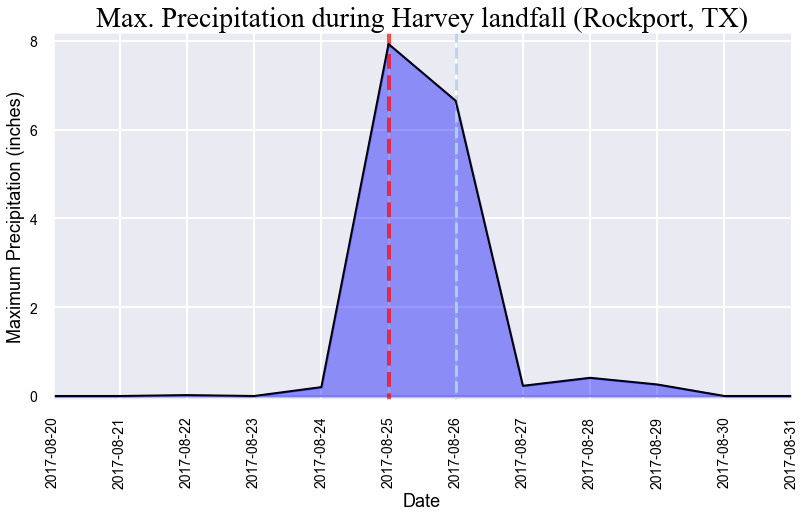

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_prcp_max["Date"]
y_data = df_prcp_max["Value"]
# Make a color map
t = np.arange(len(y_data))
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Creating padding around the y limits
y_pad = abs(0.2*y_data.mean()) # 20% of mean y value
# Sets the y limits of the current chart
plt.ylim(-0.1,y_data.max()+y_pad )
# Plotting the data
plt.plot(x_data,y_data,color="black",linewidth = 2)
plt.fill_between(x_data,y_data,color = "blue", alpha = 0.4)
# Creating a vertical line denoting the landfall date
plt.vlines("2017-08-25",(y_data.min()-y_pad),(y_data.max()+y_pad),color="red",alpha=0.7,linewidth=4,linestyle="dashed")
plt.vlines("2017-08-26",(y_data.min()-y_pad),(y_data.max()+y_pad),color="lightblue",alpha=0.9,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Max. Precipitation during Harvey landfall (Rockport, TX)",fontsize=28,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Maximum Precipitation (inches)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Max_Harvey_Precipitation.png")
# Display the plot
plt.show()

## Let's create total precipitation dataframe

In [21]:
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_prcp["Value"].groupby(df_prcp["Date"]) # Create a GroupBy object
# Let's create a dataframe with maximum precipitation per day
df_prcp_sum_unsorted = grouped_count.sum().to_frame("Value")
# Let's sort the dataframe by date
df_prcp_sum = df_prcp_sum_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp_sum.reset_index(inplace=True)
# Save the dataframe to the output file
df_prcp_sum.to_csv("Output_Data/Harvey_Prcp_total.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of total precipitation dataframe is:{}".format(df_prcp_sum.shape)+'\033[0m')
df_prcp_sum.head()

The shape of total precipitation dataframe is:(12, 2)


,Date,Value
0,2017-08-20,0.00
1,2017-08-21,0.00
2,2017-08-22,0.02
3,2017-08-23,0.00
4,2017-08-24,0.31


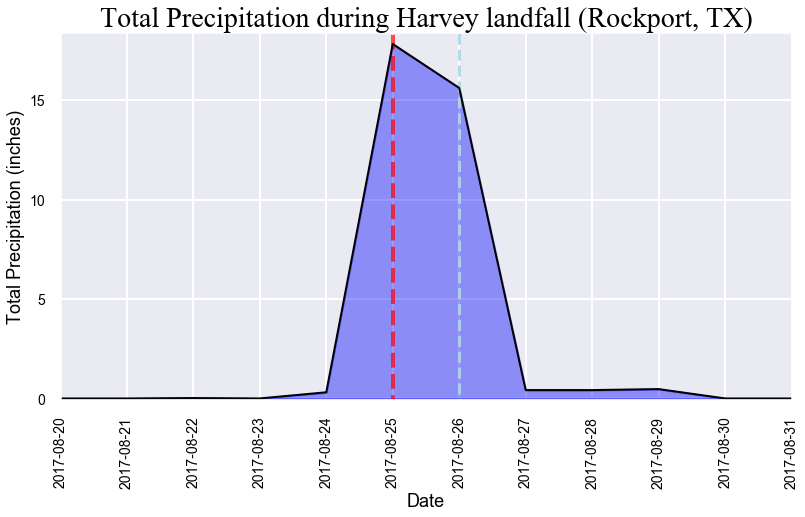

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_prcp_sum["Date"]
y_data = df_prcp_sum["Value"]
# Make a color map
t = np.arange(len(y_data))
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Creating padding around the y limits
y_pad = abs(0.2*y_data.mean()) # 20% of mean y value
# Sets the y limits of the current chart
plt.ylim(-0.1,y_data.max()+y_pad )
# Plotting the data
plt.plot(x_data,y_data,color="black",linewidth = 2)
plt.fill_between(x_data,y_data,color = "blue", alpha = 0.4)
# Creating a vertical line denoting the landfall date
plt.vlines("2017-08-25",(y_data.min()-y_pad),(y_data.max()+y_pad),color="red",alpha=0.7,linewidth=4,linestyle="dashed")
plt.vlines("2017-08-26",(y_data.min()-y_pad),(y_data.max()+y_pad),color="lightblue",alpha=0.9,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Total Precipitation during Harvey landfall (Rockport, TX)",fontsize=28,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Total Precipitation (inches)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Total_Harvey_Precipitation.png")
# Display the plot
plt.show()

## Let's create merged dataframe with minimum and maximum temperatures

In [23]:
# A copy of the minimum temperature dataframe with relevant colummns
df_min = df_MinTemp[["Date","Value"]]
# Let's groupby value column by date and count the minimum ocurrences
grouped_count = df_min["Value"].groupby(df_min["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_min_unsorted = grouped_count.min().to_frame("MinTemp")
# Let's sort the dataframe by date
df_min = df_min_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_min.reset_index(inplace=True)
# A copy of the maximum temperature dataframe with relevant colummns
df_max = df_MaxTemp[["Date","Value"]]
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_max["Value"].groupby(df_max["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_max_unsorted = grouped_count.max().to_frame("MaxTemp")
# Let's sort the dataframe by date
df_max = df_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_max.reset_index(inplace=True)
# Combine the dataframes into a single dataframe
df_MinMax = pd.merge(df_max, df_min, how="outer", on="Date")
# Save the dataframe to the output file
df_MinMax.to_csv("Output_Data/Harvey_MinMax_Temp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the min-max temperature dataframe is:{}".format(df_MinMax.shape)+'\033[0m')
df_MinMax.head() # Display the dataframe

The shape of the min-max temperature dataframe is:(12, 3)


,Date,MaxTemp,MinTemp
0,2017-08-20,95.0,71.0
1,2017-08-21,94.0,77.0
2,2017-08-22,94.0,70.0
3,2017-08-23,95.0,69.0
4,2017-08-24,94.0,75.0


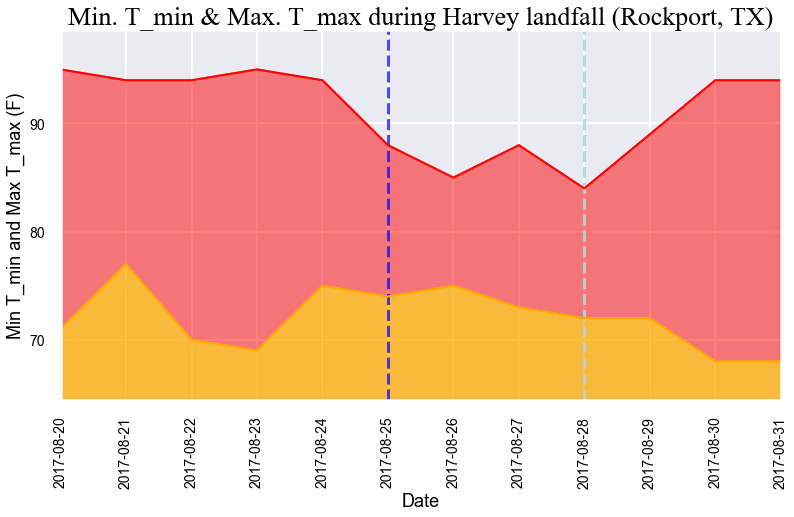

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_MinMax["Date"]
y_max = df_MinMax["MaxTemp"]
y_min = df_MinMax["MinTemp"]
# Make a color map
t = np.arange(12)
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Creating padding around the x and y limits
y_pad = abs(0.05*y_min.mean()) # 12% of mean y value
# Sets the y limits of the current chart
plt.ylim(y_min.min()-y_pad,y_max.max()+y_pad )
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Plot Maximum Temperature data
plt.plot(x_data,y_max,color="red",linewidth = 2)
# Plot Minimum Temperature data
plt.plot(x_data,y_min,color="orange",linewidth = 2)
# Filling the area below the line plots
plt.fill_between(x_data,y_max,color = "red", alpha = 0.5)
plt.fill_between(x_data,y_min,color = "yellow", alpha = 0.5)
# Creating a vertical line denoting the landfall date
plt.vlines("2017-08-25",(y_min.min()-y_pad),(y_max.max()+y_pad),color="blue",alpha=0.7,linestyle="dashed")
plt.vlines("2017-08-28",(y_min.min()-y_pad),(y_max.max()+y_pad),color="lightblue",alpha=0.9,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Min. T_min & Max. T_max during Harvey landfall (Rockport, TX)",fontsize=26,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Min T_min and Max T_max (F)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Harvey_MinMaxTemp.png")
# Display the plot
plt.show()

## Let's create merged dataframe with average minimum and maximum temperatures

In [25]:
# A copy of the minimum temperature dataframe with relevant colummns
df_min_avg = df_MinTemp[["Date","Value"]]
# Let's groupby value column by date and count the minimum ocurrences
grouped_count = df_min_avg["Value"].groupby(df_min_avg["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_min_unsorted = grouped_count.mean().to_frame("Min_Avg_Temp")
# Let's sort the dataframe by date
df_min_avg = df_min_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_min_avg.reset_index(inplace=True)
# A copy of the maximum temperature dataframe with relevant colummns
df_max_avg = df_MaxTemp[["Date","Value"]]
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_max_avg["Value"].groupby(df_max_avg["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_max_unsorted = grouped_count.mean().to_frame("Max_Avg_Temp")
# Let's sort the dataframe by date
df_max_avg = df_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_max_avg.reset_index(inplace=True)
# Combine the dataframes into a single dataframe
df_MinMax_avg = pd.merge(df_max_avg, df_min_avg, how="outer", on="Date")
# Save the dataframe to the output file
df_MinMax_avg.to_csv("Output_Data/Harvey_AvgMinMax_Temp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the average min-max temperature dataframe is:{}".format(df_MinMax_avg.shape)+'\033[0m')
df_MinMax_avg.head() # Display the dataframe

The shape of the average min-max temperature dataframe is:(12, 3)


,Date,Max_Avg_Temp,Min_Avg_Temp
0,2017-08-20,92.8,77.0
1,2017-08-21,92.0,80.0
2,2017-08-22,92.4,76.4
3,2017-08-23,92.0,75.5
4,2017-08-24,92.0,78.0


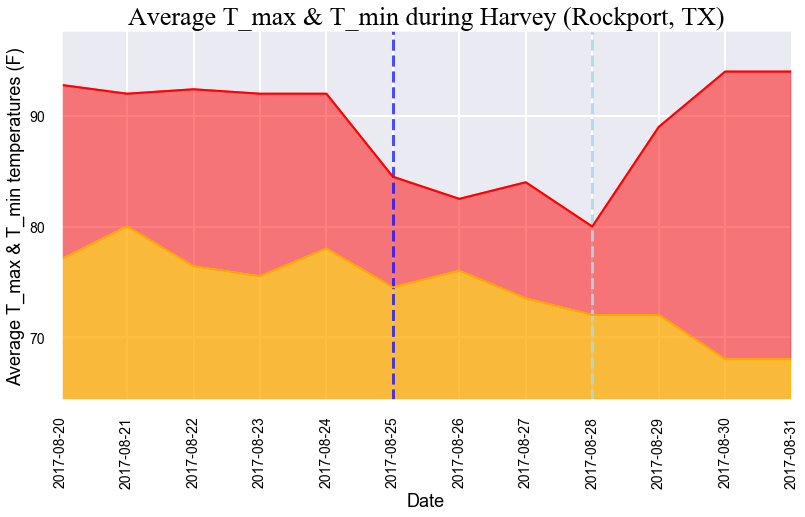

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_MinMax_avg["Date"]
y_max = df_MinMax_avg["Max_Avg_Temp"]
y_min = df_MinMax_avg["Min_Avg_Temp"]
# Make a color map
t = np.arange(12)
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Creating padding around the x and y limits
y_pad = abs(0.05*y_min.mean()) # 12% of mean y value
# Sets the y limits of the current chart
plt.ylim(y_min.min()-y_pad,y_max.max()+y_pad )
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Plot Maximum Temperature data
plt.plot(x_data,y_max,color="red",linewidth = 2)
# Plot Minimum Temperature data
plt.plot(x_data,y_min,color="orange",linewidth = 2)
# Filling the area below the line plots
plt.fill_between(x_data,y_max,color = "red", alpha = 0.5)
plt.fill_between(x_data,y_min,color = "yellow", alpha = 0.5)
# Creating a vertical line denoting the landfall date
plt.vlines("2017-08-25",(y_min.min()-y_pad),(y_max.max()+y_pad),color="blue",alpha=0.7,linestyle="dashed")
plt.vlines("2017-08-28",(y_min.min()-y_pad),(y_max.max()+y_pad),color="lightblue",alpha=0.9,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Average T_max & T_min during Harvey (Rockport, TX)",fontsize=26,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Average T_max & T_min temperatures (F)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Harvey_MinMaxAvgTemp.png")
# Display the plot
plt.show()